# Dataset Preperation

### Entering Dataset 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from IPython import display
import os
import re
from colorama import Fore, Back, Style
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [2]:
df = pd.read_csv('audited fin data.csv')
df.head()

,Refno,PrjType,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,...,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,User_Add,User_Upd
0,0002/1992,GENN,24,2001-03-31 00:00:00.000,A,243.932,326.252,0.0,214.358,169.127,...,22.0,39.342,110.446,286.502,801.461,19.703,-10.370,30.073,Shak-02/03/2004-13:14,NaN
1,0002/1992,GENN,24,2002-03-31 00:00:00.000,A,233.469,335.454,0.0,189.859,116.591,...,22.0,85.014,72.728,244.085,837.821,39.589,6.084,33.505,Shak-02/03/2004-13:12,NaN
2,0003/1992,GENN,21,2003-12-31 00:00:00.000,A,113.110,366.460,0.0,575.690,95.590,...,24.5,24.660,11.070,667.190,753.540,-82.550,0.000,-82.550,Sama-03/09/2004-15:58,Sama-03/09/2004-16:02
3,0003/1992,GENN,21,2004-12-31 00:00:00.000,A,168.380,434.974,0.0,718.230,140.907,...,24.5,4.245,23.596,872.894,1.047,-11.678,8.735,-20.413,Sama-16/01/2006-12:11,NaN
4,0003/1992,GENN,21,2005-12-31 00:00:00.000,A,54.346,129.209,0.0,257.952,10.474,...,24.5,-253.997,8.702,537.718,247.197,-265.843,7.601,-273.444,Sama-11/10/2006-09:45,NaN


#### Data Clensing 

In [3]:
#unwanted feature reduction
df = df.drop('User_Add', axis = 1)
df = df.drop('User_Upd', axis=1)

In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23999    False
24000    False
24001    False
24002    False
24003    False
Length: 24004, dtype: bool

In [5]:
df.isnull().sum()

Refno           0
PrjType         0
PrjCat          0
Year_End        0
AudType         0
WDA_FA          0
FA_Cost         0
D_Expense       0
Cur_Assets      0
Stock_Invent    0
Cash_Bank       0
Sh_Cap_Adv      0
Reserves        0
NC_Liab         0
Cur_Liab        0
Turnover        0
Pro_Bef_Tax     0
Tax             0
Pro_Aft_Tax     0
dtype: int64

In [6]:

df['Refno'] = df['Refno'].astype(str) + '-'+ df['PrjType'].astype(str)
df['Tot_Liab'] = df['NC_Liab'] + df['Cur_Liab']
df['Tot_Assets'] = df['Cur_Assets'] + df['Stock_Invent'] + df['Cash_Bank'] 
df['Liquidity_Rate'] = (df['Cur_Assets'] / df['Cur_Liab'])
df['Net_pro_Rate'] = (df['Pro_Bef_Tax'] / df['Turnover'])*100
df['Gear_Rate'] = (df['NC_Liab'] / df['Sh_Cap_Adv'])
df

,Refno,PrjType,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
0,0002/1992-GENN,GENN,24,2001-03-31 00:00:00.000,A,243.932,326.252,0.0,214.358,169.127,...,286.502,801.461,19.703,-10.370,30.073,396.948,383.485,0.748190,2.458385,5.020273
1,0002/1992-GENN,GENN,24,2002-03-31 00:00:00.000,A,233.469,335.454,0.0,189.859,116.591,...,244.085,837.821,39.589,6.084,33.505,316.813,335.877,0.777840,4.725234,3.305818
2,0003/1992-GENN,GENN,21,2003-12-31 00:00:00.000,A,113.110,366.460,0.0,575.690,95.590,...,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
3,0003/1992-GENN,GENN,21,2004-12-31 00:00:00.000,A,168.380,434.974,0.0,718.230,140.907,...,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
4,0003/1992-GENN,GENN,21,2005-12-31 00:00:00.000,A,54.346,129.209,0.0,257.952,10.474,...,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,9999/2008-GENN,GENN,71,2011-03-31 00:00:00.000,A,15.960,21.910,0.0,28.700,0.000,...,6.990,7.800,1.580,0.000,1.580,6.990,32.400,4.105866,20.256410,0.000000
24000,9999/2008-GENN,GENN,71,2012-03-31 00:00:00.000,A,11.070,21.910,0.0,53.840,0.000,...,4.050,36.310,23.270,0.080,23.200,4.050,56.730,13.293827,64.087028,0.000000
24001,9999/2008-GENN,GENN,71,2013-03-31 00:00:00.000,A,16.475,32.644,0.0,23.176,0.000,...,37.045,2.676,-5.680,0.275,-5.955,37.045,26.347,0.625617,-212.257100,0.000000
24002,9999/2008-GENN,GENN,71,2014-03-31 00:00:00.000,A,9.707,32.644,0.0,34.528,0.000,...,7.451,30.252,19.927,0.000,19.927,7.451,69.053,4.634009,65.870025,0.000000


In [7]:
df = df.drop('PrjType', axis = 1)

In [8]:
df["Year_End"]= df["Year_End"].str.slice(0,10)
df

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
0,0002/1992-GENN,24,2001-03-31,A,243.932,326.252,0.0,214.358,169.127,0.000,...,286.502,801.461,19.703,-10.370,30.073,396.948,383.485,0.748190,2.458385,5.020273
1,0002/1992-GENN,24,2002-03-31,A,233.469,335.454,0.0,189.859,116.591,29.427,...,244.085,837.821,39.589,6.084,33.505,316.813,335.877,0.777840,4.725234,3.305818
2,0003/1992-GENN,21,2003-12-31,A,113.110,366.460,0.0,575.690,95.590,36.210,...,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
3,0003/1992-GENN,21,2004-12-31,A,168.380,434.974,0.0,718.230,140.907,26.937,...,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
4,0003/1992-GENN,21,2005-12-31,A,54.346,129.209,0.0,257.952,10.474,4.214,...,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,9999/2008-GENN,71,2011-03-31,A,15.960,21.910,0.0,28.700,0.000,3.700,...,6.990,7.800,1.580,0.000,1.580,6.990,32.400,4.105866,20.256410,0.000000
24000,9999/2008-GENN,71,2012-03-31,A,11.070,21.910,0.0,53.840,0.000,2.890,...,4.050,36.310,23.270,0.080,23.200,4.050,56.730,13.293827,64.087028,0.000000
24001,9999/2008-GENN,71,2013-03-31,A,16.475,32.644,0.0,23.176,0.000,3.171,...,37.045,2.676,-5.680,0.275,-5.955,37.045,26.347,0.625617,-212.257100,0.000000
24002,9999/2008-GENN,71,2014-03-31,A,9.707,32.644,0.0,34.528,0.000,34.525,...,7.451,30.252,19.927,0.000,19.927,7.451,69.053,4.634009,65.870025,0.000000


In [9]:
pd.to_datetime(df['Year_End'])

0       2001-03-31
1       2002-03-31
2       2003-12-31
3       2004-12-31
4       2005-12-31
           ...    
23999   2011-03-31
24000   2012-03-31
24001   2013-03-31
24002   2014-03-31
24003   2015-03-31
Name: Year_End, Length: 24004, dtype: datetime64[ns]

In [10]:
df_com =df
df_com['Refno'] = df_com['Refno'].str.replace("/",'-')
df_com

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
0,0002-1992-GENN,24,2001-03-31,A,243.932,326.252,0.0,214.358,169.127,0.000,...,286.502,801.461,19.703,-10.370,30.073,396.948,383.485,0.748190,2.458385,5.020273
1,0002-1992-GENN,24,2002-03-31,A,233.469,335.454,0.0,189.859,116.591,29.427,...,244.085,837.821,39.589,6.084,33.505,316.813,335.877,0.777840,4.725234,3.305818
2,0003-1992-GENN,21,2003-12-31,A,113.110,366.460,0.0,575.690,95.590,36.210,...,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
3,0003-1992-GENN,21,2004-12-31,A,168.380,434.974,0.0,718.230,140.907,26.937,...,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
4,0003-1992-GENN,21,2005-12-31,A,54.346,129.209,0.0,257.952,10.474,4.214,...,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,9999-2008-GENN,71,2011-03-31,A,15.960,21.910,0.0,28.700,0.000,3.700,...,6.990,7.800,1.580,0.000,1.580,6.990,32.400,4.105866,20.256410,0.000000
24000,9999-2008-GENN,71,2012-03-31,A,11.070,21.910,0.0,53.840,0.000,2.890,...,4.050,36.310,23.270,0.080,23.200,4.050,56.730,13.293827,64.087028,0.000000
24001,9999-2008-GENN,71,2013-03-31,A,16.475,32.644,0.0,23.176,0.000,3.171,...,37.045,2.676,-5.680,0.275,-5.955,37.045,26.347,0.625617,-212.257100,0.000000
24002,9999-2008-GENN,71,2014-03-31,A,9.707,32.644,0.0,34.528,0.000,34.525,...,7.451,30.252,19.927,0.000,19.927,7.451,69.053,4.634009,65.870025,0.000000


In [78]:
df['Refno'] = df['Refno'].str.replace("/",'-')

In [79]:
gq = df.groupby('Year_End')

In [11]:
le = LabelEncoder()

#df['Refno'] = le.fit_transform(df['Refno'])
df['AudType'] = le.fit_transform(df['AudType'])
df['Refno'].unique()

array(['0002-1992-GENN', '0003-1992-GENN', '0004-1992-GENN', ...,
       '9997-2008-GENN', '9998-2008-GENN', '9999-2008-GENN'], dtype=object)

In [12]:
df['AudType'].unique()

array([0, 1])

In [13]:
df

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
0,0002-1992-GENN,24,2001-03-31,0,243.932,326.252,0.0,214.358,169.127,0.000,...,286.502,801.461,19.703,-10.370,30.073,396.948,383.485,0.748190,2.458385,5.020273
1,0002-1992-GENN,24,2002-03-31,0,233.469,335.454,0.0,189.859,116.591,29.427,...,244.085,837.821,39.589,6.084,33.505,316.813,335.877,0.777840,4.725234,3.305818
2,0003-1992-GENN,21,2003-12-31,0,113.110,366.460,0.0,575.690,95.590,36.210,...,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
3,0003-1992-GENN,21,2004-12-31,0,168.380,434.974,0.0,718.230,140.907,26.937,...,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
4,0003-1992-GENN,21,2005-12-31,0,54.346,129.209,0.0,257.952,10.474,4.214,...,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,9999-2008-GENN,71,2011-03-31,0,15.960,21.910,0.0,28.700,0.000,3.700,...,6.990,7.800,1.580,0.000,1.580,6.990,32.400,4.105866,20.256410,0.000000
24000,9999-2008-GENN,71,2012-03-31,0,11.070,21.910,0.0,53.840,0.000,2.890,...,4.050,36.310,23.270,0.080,23.200,4.050,56.730,13.293827,64.087028,0.000000
24001,9999-2008-GENN,71,2013-03-31,0,16.475,32.644,0.0,23.176,0.000,3.171,...,37.045,2.676,-5.680,0.275,-5.955,37.045,26.347,0.625617,-212.257100,0.000000
24002,9999-2008-GENN,71,2014-03-31,0,9.707,32.644,0.0,34.528,0.000,34.525,...,7.451,30.252,19.927,0.000,19.927,7.451,69.053,4.634009,65.870025,0.000000


In [15]:
gp = df.groupby('Refno')
gp.get_group('0003-1992-GENN')

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
2,0003-1992-GENN,21,2003-12-31,0,113.110,366.460,0.0,575.690,95.590,36.210,...,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
3,0003-1992-GENN,21,2004-12-31,0,168.380,434.974,0.0,718.230,140.907,26.937,...,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
4,0003-1992-GENN,21,2005-12-31,0,54.346,129.209,0.0,257.952,10.474,4.214,...,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
5,0003-1992-GENN,21,2006-12-31,0,52.546,142.724,0.0,160.503,8.799,0.814,...,564.891,110.459,-128.905,0.000,-128.905,571.451,170.116,0.284131,-116.699409,0.267755
6,0003-1992-GENN,21,2007-12-31,0,48.381,139.719,0.0,69.296,13.453,2.449,...,563.660,109.711,-95.562,0.000,-95.562,571.642,85.198,0.122939,-87.103390,0.325796
7,0003-1992-GENN,21,2008-12-31,0,48.249,140.527,0.0,17.835,12.511,0.606,...,586.251,128.937,-81.135,0.000,-81.135,597.858,30.952,0.030422,-62.926080,0.473755
8,0003-1992-GENN,21,2009-12-31,0,45.514,135.792,0.0,15.262,13.224,0.218,...,697.936,95.255,-67.422,0.000,-67.422,709.972,28.704,0.021867,-70.780536,0.491265
9,0003-1992-GENN,21,2010-12-31,0,44.482,127.670,0.0,17.174,13.652,0.442,...,789.602,155.444,-142.534,0.000,-142.534,803.386,31.268,0.021750,-91.694758,0.562612
10,0003-1992-GENN,21,2011-12-31,0,56.836,117.000,0.0,7.318,5.031,0.892,...,87.716,125.785,-293.199,0.000,-293.199,97.411,13.241,0.083428,-233.095361,0.395714
11,0003-1992-GENN,21,2012-12-31,0,48.447,110.688,0.0,19.237,3.954,0.222,...,131.890,141.089,-40.460,0.000,-40.460,141.402,23.413,0.145856,-28.676934,0.388245


In [ ]:
len(gp)

In [16]:
gp.get_group('9999-2008-GENN')

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
23997,9999-2008-GENN,71,2009-03-31,0,6.903,7.317,0.0,14.187,0.0,0.398,...,0.348,36.250,29.512,0.285,29.227,0.348,14.585,40.767241,81.412414,0.0
23998,9999-2008-GENN,71,2010-03-31,0,23.127,25.633,0.0,51.880,0.0,0.248,...,14.675,35.744,26.027,0.216,25.811,14.675,52.128,3.535264,72.815018,0.0
23999,9999-2008-GENN,71,2011-03-31,0,15.960,21.910,0.0,28.700,0.0,3.700,...,6.990,7.800,1.580,0.000,1.580,6.990,32.400,4.105866,20.256410,0.0
24000,9999-2008-GENN,71,2012-03-31,0,11.070,21.910,0.0,53.840,0.0,2.890,...,4.050,36.310,23.270,0.080,23.200,4.050,56.730,13.293827,64.087028,0.0
24001,9999-2008-GENN,71,2013-03-31,0,16.475,32.644,0.0,23.176,0.0,3.171,...,37.045,2.676,-5.680,0.275,-5.955,37.045,26.347,0.625617,-212.257100,0.0
24002,9999-2008-GENN,71,2014-03-31,0,9.707,32.644,0.0,34.528,0.0,34.525,...,7.451,30.252,19.927,0.000,19.927,7.451,69.053,4.634009,65.870025,0.0
24003,9999-2008-GENN,71,2015-03-31,0,5.350,32.645,0.0,31.318,0.0,1.903,...,2.440,5.543,-2.549,0.007,-2.556,2.440,33.221,12.835246,-45.985928,0.0


In [17]:
com_1 = gp.get_group('0003-1992-GENN')
com_1 = com_1.drop('Refno', axis =1)
com_1 = com_1.drop('AudType',axis =1)
com_1 = com_1.drop('PrjCat',axis =1)

In [18]:
com_1['Year_End'] = pd.to_datetime(com_1['Year_End'], format='%Y-%m-%d')
com_1 = com_1.set_index('Year_End')
com_1

,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
Year_End,,,,,,,,,,,,,,,,,,,
2003-12-31,113.110,366.460,0.0,575.690,95.590,36.210,24.500,24.660,11.070,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
2004-12-31,168.380,434.974,0.0,718.230,140.907,26.937,24.500,4.245,23.596,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
2005-12-31,54.346,129.209,0.0,257.952,10.474,4.214,24.500,-253.997,8.702,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
2006-12-31,52.546,142.724,0.0,160.503,8.799,0.814,24.500,-382.902,6.560,564.891,110.459,-128.905,0.000,-128.905,571.451,170.116,0.284131,-116.699409,0.267755
2007-12-31,48.381,139.719,0.0,69.296,13.453,2.449,24.500,-478.465,7.982,563.660,109.711,-95.562,0.000,-95.562,571.642,85.198,0.122939,-87.103390,0.325796
2008-12-31,48.249,140.527,0.0,17.835,12.511,0.606,24.500,-556.274,11.607,586.251,128.937,-81.135,0.000,-81.135,597.858,30.952,0.030422,-62.926080,0.473755
2009-12-31,45.514,135.792,0.0,15.262,13.224,0.218,24.500,-623.696,12.036,697.936,95.255,-67.422,0.000,-67.422,709.972,28.704,0.021867,-70.780536,0.491265
2010-12-31,44.482,127.670,0.0,17.174,13.652,0.442,24.500,-766.230,13.784,789.602,155.444,-142.534,0.000,-142.534,803.386,31.268,0.021750,-91.694758,0.562612
2011-12-31,56.836,117.000,0.0,7.318,5.031,0.892,24.500,-57.756,9.695,87.716,125.785,-293.199,0.000,-293.199,97.411,13.241,0.083428,-233.095361,0.395714


In [19]:

"""min_year = com_1['Year_End'].min().year
max_year = com_1['Year_End'].max().year

year_range = pd.date_range(start=str(min_year), end=str(max_year), freq='YS', name='Year_End')

df_complete_years = pd.DataFrame({'Year_End': year_range})


df_complete_years"""

df_resampled = com_1.groupby(pd.Grouper(freq='Y')).sum()

# Reset the index to bring the 'Date' column back
df_resampled = df_resampled.reset_index()




In [20]:
df_resampled

,Year_End,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
0,2003-12-31,113.110,366.460,0.0,575.690,95.590,36.210,24.500,24.660,11.070,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
1,2004-12-31,168.380,434.974,0.0,718.230,140.907,26.937,24.500,4.245,23.596,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
2,2005-12-31,54.346,129.209,0.0,257.952,10.474,4.214,24.500,-253.997,8.702,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
3,2006-12-31,52.546,142.724,0.0,160.503,8.799,0.814,24.500,-382.902,6.560,564.891,110.459,-128.905,0.000,-128.905,571.451,170.116,0.284131,-116.699409,0.267755
4,2007-12-31,48.381,139.719,0.0,69.296,13.453,2.449,24.500,-478.465,7.982,563.660,109.711,-95.562,0.000,-95.562,571.642,85.198,0.122939,-87.103390,0.325796
5,2008-12-31,48.249,140.527,0.0,17.835,12.511,0.606,24.500,-556.274,11.607,586.251,128.937,-81.135,0.000,-81.135,597.858,30.952,0.030422,-62.926080,0.473755
6,2009-12-31,45.514,135.792,0.0,15.262,13.224,0.218,24.500,-623.696,12.036,697.936,95.255,-67.422,0.000,-67.422,709.972,28.704,0.021867,-70.780536,0.491265
7,2010-12-31,44.482,127.670,0.0,17.174,13.652,0.442,24.500,-766.230,13.784,789.602,155.444,-142.534,0.000,-142.534,803.386,31.268,0.021750,-91.694758,0.562612
8,2011-12-31,56.836,117.000,0.0,7.318,5.031,0.892,24.500,-57.756,9.695,87.716,125.785,-293.199,0.000,-293.199,97.411,13.241,0.083428,-233.095361,0.395714
9,2012-12-31,48.447,110.688,0.0,19.237,3.954,0.222,24.500,-98.217,9.512,131.890,141.089,-40.460,0.000,-40.460,141.402,23.413,0.145856,-28.676934,0.388245


In [22]:
column_means = df_resampled.mean()
df_resampled = df_resampled.mask(df_resampled == 0, df_resampled.mean(),axis=1)
df_resampled

,Year_End,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
0,2003-12-31,113.110000,366.460000,0.0,575.690000,95.590000,36.210000,24.500000,24.660000,11.070000,667.190000,753.540000,-82.550000,1.244105,-82.550,678.260000,707.490000,0.862858,-10.954959,0.451837
1,2004-12-31,168.380000,434.974000,0.0,718.230000,140.907000,26.937000,24.500000,4.245000,23.596000,872.894000,1.047000,-11.678000,8.735000,-20.413,896.490000,886.074000,0.822815,-1115.377268,0.963102
2,2005-12-31,54.346000,129.209000,0.0,257.952000,10.474000,4.214000,24.500000,-253.997000,8.702000,537.718000,247.197000,-265.843000,7.601000,-273.444,546.420000,272.640000,0.479716,-107.542972,0.355184
3,2006-12-31,52.546000,142.724000,0.0,160.503000,8.799000,0.814000,24.500000,-382.902000,6.560000,564.891000,110.459000,-128.905000,1.244105,-128.905,571.451000,170.116000,0.284131,-116.699409,0.267755
4,2007-12-31,48.381000,139.719000,0.0,69.296000,13.453000,2.449000,24.500000,-478.465000,7.982000,563.660000,109.711000,-95.562000,1.244105,-95.562,571.642000,85.198000,0.122939,-87.103390,0.325796
5,2008-12-31,48.249000,140.527000,0.0,17.835000,12.511000,0.606000,24.500000,-556.274000,11.607000,586.251000,128.937000,-81.135000,1.244105,-81.135,597.858000,30.952000,0.030422,-62.926080,0.473755
6,2009-12-31,45.514000,135.792000,0.0,15.262000,13.224000,0.218000,24.500000,-623.696000,12.036000,697.936000,95.255000,-67.422000,1.244105,-67.422,709.972000,28.704000,0.021867,-70.780536,0.491265
7,2010-12-31,44.482000,127.670000,0.0,17.174000,13.652000,0.442000,24.500000,-766.230000,13.784000,789.602000,155.444000,-142.534000,1.244105,-142.534,803.386000,31.268000,0.021750,-91.694758,0.562612
8,2011-12-31,56.836000,117.000000,0.0,7.318000,5.031000,0.892000,24.500000,-57.756000,9.695000,87.716000,125.785000,-293.199000,1.244105,-293.199,97.411000,13.241000,0.083428,-233.095361,0.395714
9,2012-12-31,48.447000,110.688000,0.0,19.237000,3.954000,0.222000,24.500000,-98.217000,9.512000,131.890000,141.089000,-40.460000,1.244105,-40.460,141.402000,23.413000,0.145856,-28.676934,0.388245


In [23]:
com_1 = df_resampled
com_1 = com_1.set_index('Year_End')

com_1

,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
Year_End,,,,,,,,,,,,,,,,,,,
2003-12-31,113.110000,366.460000,0.0,575.690000,95.590000,36.210000,24.500000,24.660000,11.070000,667.190000,753.540000,-82.550000,1.244105,-82.550,678.260000,707.490000,0.862858,-10.954959,0.451837
2004-12-31,168.380000,434.974000,0.0,718.230000,140.907000,26.937000,24.500000,4.245000,23.596000,872.894000,1.047000,-11.678000,8.735000,-20.413,896.490000,886.074000,0.822815,-1115.377268,0.963102
2005-12-31,54.346000,129.209000,0.0,257.952000,10.474000,4.214000,24.500000,-253.997000,8.702000,537.718000,247.197000,-265.843000,7.601000,-273.444,546.420000,272.640000,0.479716,-107.542972,0.355184
2006-12-31,52.546000,142.724000,0.0,160.503000,8.799000,0.814000,24.500000,-382.902000,6.560000,564.891000,110.459000,-128.905000,1.244105,-128.905,571.451000,170.116000,0.284131,-116.699409,0.267755
2007-12-31,48.381000,139.719000,0.0,69.296000,13.453000,2.449000,24.500000,-478.465000,7.982000,563.660000,109.711000,-95.562000,1.244105,-95.562,571.642000,85.198000,0.122939,-87.103390,0.325796
2008-12-31,48.249000,140.527000,0.0,17.835000,12.511000,0.606000,24.500000,-556.274000,11.607000,586.251000,128.937000,-81.135000,1.244105,-81.135,597.858000,30.952000,0.030422,-62.926080,0.473755
2009-12-31,45.514000,135.792000,0.0,15.262000,13.224000,0.218000,24.500000,-623.696000,12.036000,697.936000,95.255000,-67.422000,1.244105,-67.422,709.972000,28.704000,0.021867,-70.780536,0.491265
2010-12-31,44.482000,127.670000,0.0,17.174000,13.652000,0.442000,24.500000,-766.230000,13.784000,789.602000,155.444000,-142.534000,1.244105,-142.534,803.386000,31.268000,0.021750,-91.694758,0.562612
2011-12-31,56.836000,117.000000,0.0,7.318000,5.031000,0.892000,24.500000,-57.756000,9.695000,87.716000,125.785000,-293.199000,1.244105,-293.199,97.411000,13.241000,0.083428,-233.095361,0.395714


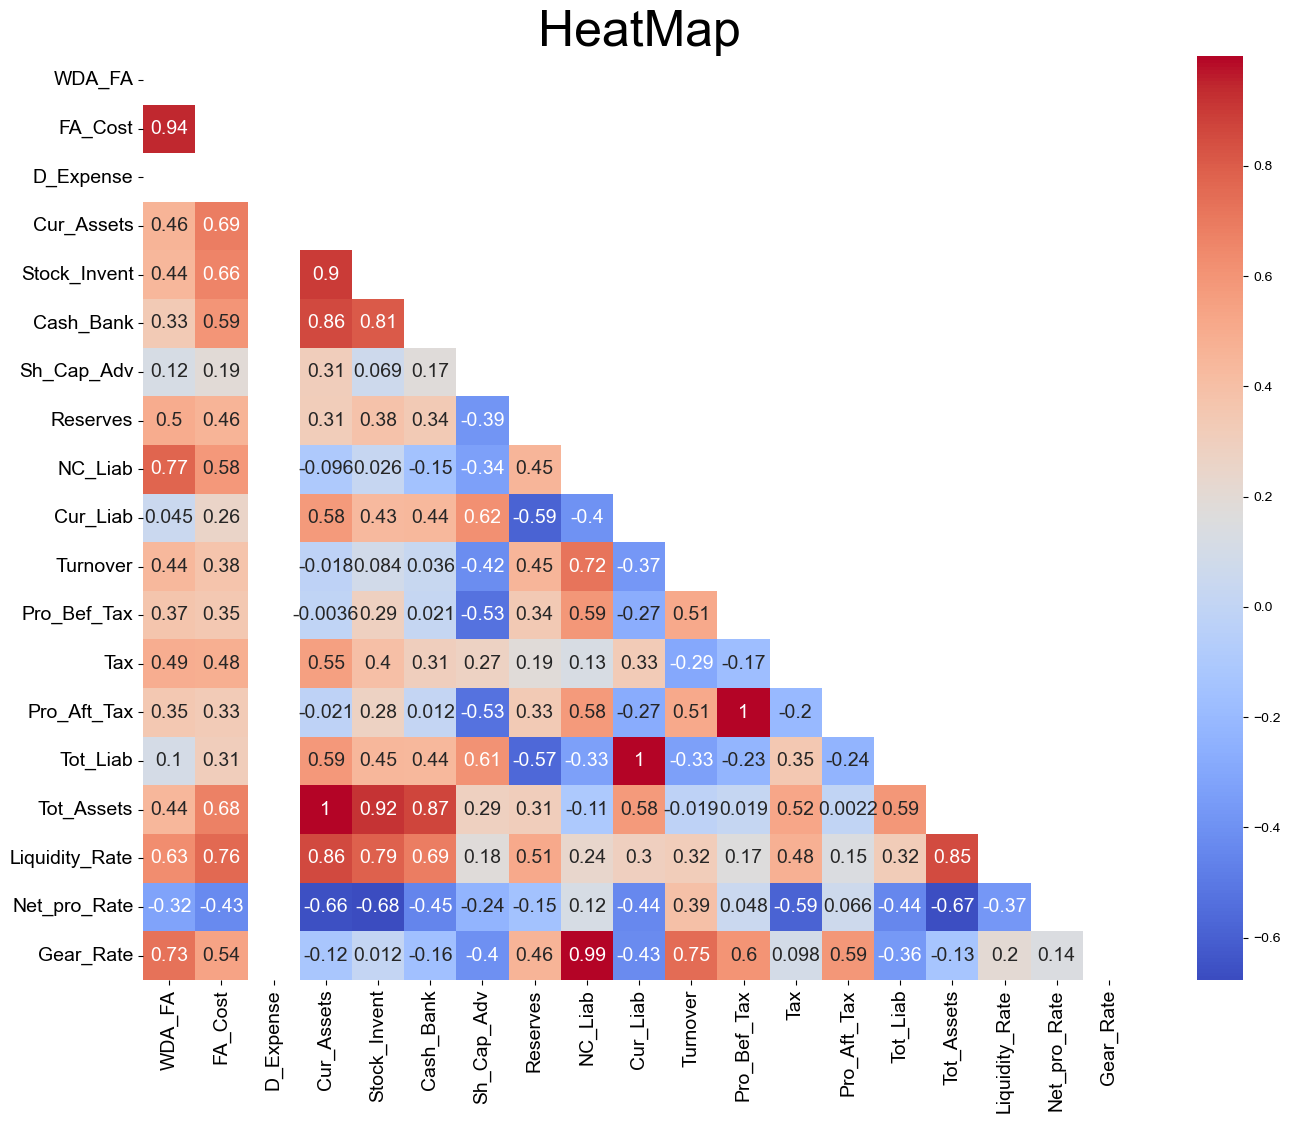

In [24]:


fig = plt.figure(figsize=(16,12))
matrix = np.triu(com_1.corr())
ax = sns.heatmap(com_1.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()
     

In [25]:
com_1.describe()

,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,Sh_Cap_Adv,Reserves,NC_Liab,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
count,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,74.112607,183.558673,0.0,126.644717,28.712593,5.203172,22.912978,-209.960327,21.927432,374.760241,363.644668,-68.832357,2.095335,-70.207421,396.687673,154.179906,0.273782,-125.552905,0.980214
std,51.310056,107.830884,0.0,197.330006,34.894516,10.007532,1.911943,238.470880,20.105587,271.229066,382.728515,91.268528,2.633879,91.564185,263.891883,241.141795,0.271508,250.400507,0.939244
min,27.555000,84.186000,0.0,0.197000,3.954000,0.078000,20.730000,-766.230000,6.560000,80.690000,1.047000,-293.199000,-2.516000,-293.199000,94.400000,0.275000,0.002441,-1115.377268,0.267755
25%,44.998000,113.844000,0.0,16.218000,12.867500,0.331000,20.731000,-318.449500,10.382500,128.155000,118.122000,-89.056000,1.244105,-89.056000,160.345000,26.058500,0.056925,-113.595486,0.423776
50%,52.546000,139.719000,0.0,39.510000,20.205158,0.726000,24.500000,-113.095000,13.784000,339.068789,247.197000,-62.276895,1.244105,-63.521000,358.907895,39.980000,0.229592,-70.780536,0.661328
75%,88.796132,202.135947,0.0,134.822158,20.205158,4.460816,24.500000,-44.878000,20.487053,575.571000,504.443421,-6.692000,1.244105,-11.059500,584.750000,154.806053,0.398635,-5.767885,0.924981
max,189.398000,434.974000,0.0,718.230000,140.907000,36.210000,24.500000,36.830000,72.480000,872.894000,1536.496000,57.182000,8.735000,59.698000,896.490000,886.074000,0.862858,4.008669,3.496382


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

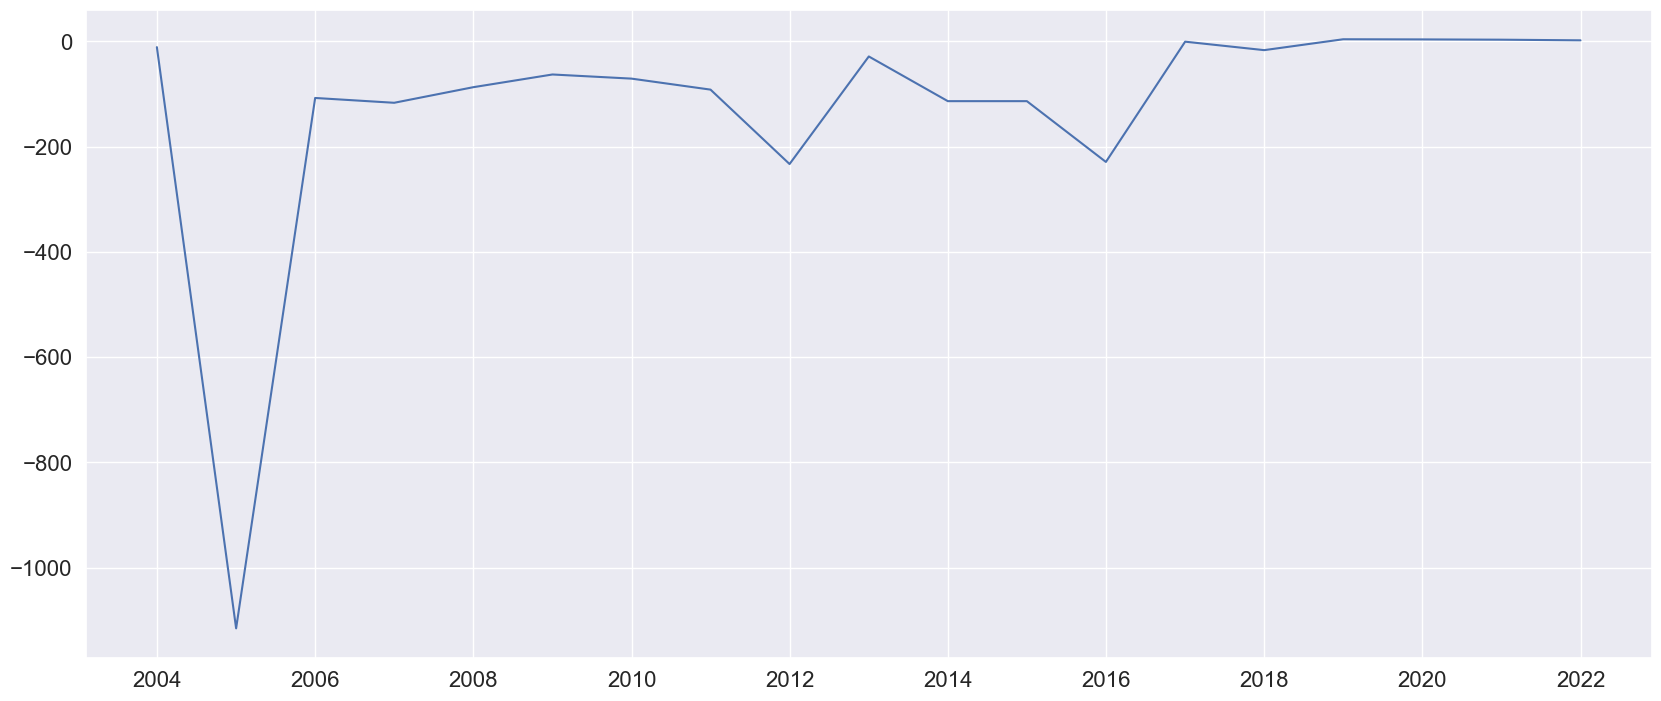

In [87]:


fig = plt.figure(figsize=(18,8))
plt.plot(com_1['Net_pro_Rate'],label='Net profit rate')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()
plt.savefig('demo.png')

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

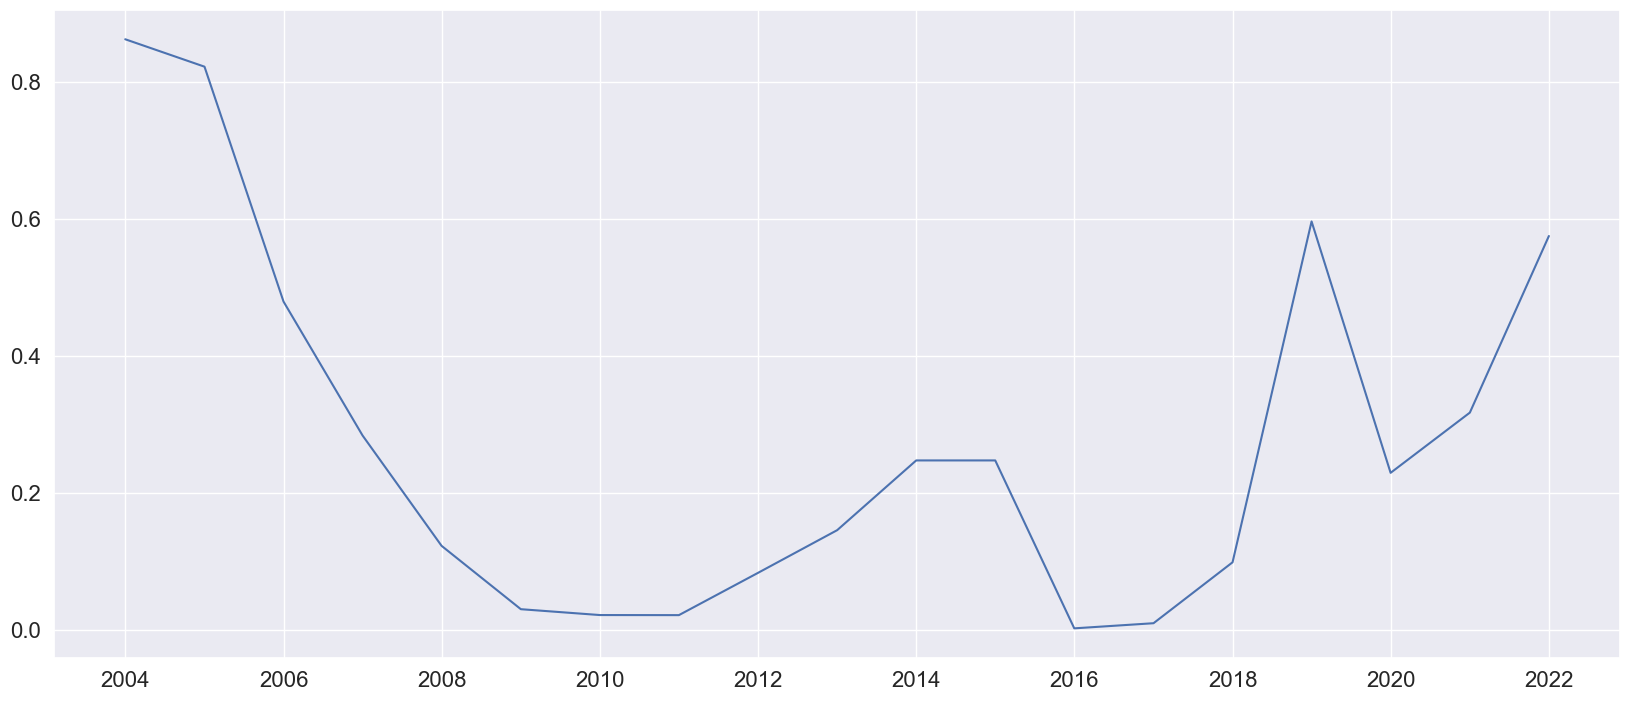

In [88]:
fig = plt.figure(figsize=(18,8))
plt.plot(com_1['Liquidity_Rate'],label='Net profit rate')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

(array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5')])

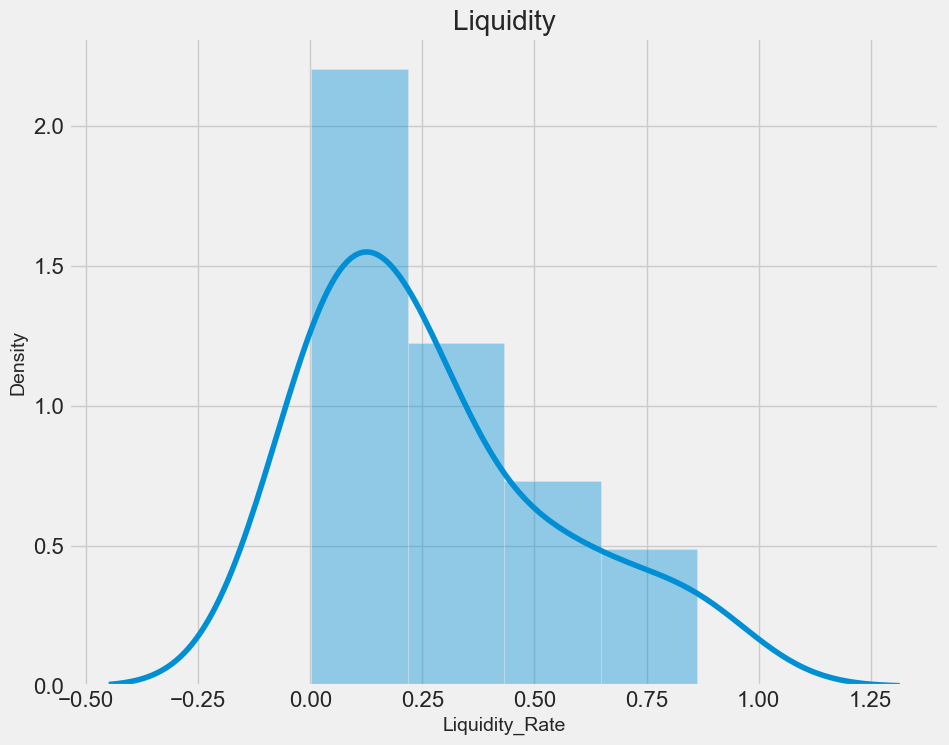

In [28]:
fig = plt.figure(figsize=(10,8))
sns.distplot(com_1['Liquidity_Rate']).set_title("Liquidity")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Text(0.5, 1.0, 'QQ Plot of The Liquidity rate of the company ')

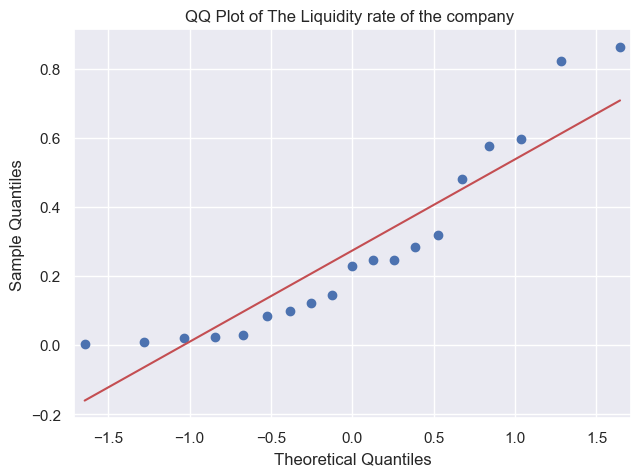

In [29]:
qq_plot = qq(com_1['Liquidity_Rate'],line='s')
plt.title('QQ Plot of The Liquidity rate of the company ')

In [30]:
com_1_prof= pd.DataFrame(com_1.iloc[:,17])
com_1_prof

,Net_pro_Rate
Year_End,
2003-12-31,-10.954959
2004-12-31,-1115.377268
2005-12-31,-107.542972
2006-12-31,-116.699409
2007-12-31,-87.103390
2008-12-31,-62.926080
2009-12-31,-70.780536
2010-12-31,-91.694758
2011-12-31,-233.095361


In [31]:
com_1_gear= pd.DataFrame(com_1.iloc[:,18])
com_1_gear

,Gear_Rate
Year_End,
2003-12-31,0.451837
2004-12-31,0.963102
2005-12-31,0.355184
2006-12-31,0.267755
2007-12-31,0.325796
2008-12-31,0.473755
2009-12-31,0.491265
2010-12-31,0.562612
2011-12-31,0.395714


In [32]:
#com_1_prof = pd.to_datetime['Year_end']

In [33]:
x = com_1.index[-5]
output = x.strftime('%Y-%m-%d')
output

'2017-12-31'

In [34]:
train = com_1_prof.loc[com_1_prof.index <  output ]
test = com_1_prof.loc[com_1_prof.index >= output]
'''train = com_1_prof.iloc[:-3]  # Selecting all rows except the last 3
test = com_1_prof.iloc[-3:]'''
train

,Net_pro_Rate
Year_End,
2003-12-31,-10.954959
2004-12-31,-1115.377268
2005-12-31,-107.542972
2006-12-31,-116.699409
2007-12-31,-87.103390
2008-12-31,-62.926080
2009-12-31,-70.780536
2010-12-31,-91.694758
2011-12-31,-233.095361


In [35]:
test

,Net_pro_Rate
Year_End,
2017-12-31,-16.670342
2018-12-31,4.008669
2019-12-31,3.721585
2020-12-31,3.193527
2021-12-31,1.979187


In [36]:
from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(train.dropna())[1])

p-value: 0.0028688367334536646


In [37]:
"""from sklearn.metrics import mean_squared_error
import numpy as np


rmse = np.sqrt(mean_squared_error(test.values, predictions))
print("RMSE:", rmse)
"""

'from sklearn.metrics import mean_squared_error\nimport numpy as np\n\n\nrmse = np.sqrt(mean_squared_error(test.values, predictions))\nprint("RMSE:", rmse)\n'

In [38]:
import itertools

# range of values for p, d, q
p_range = range(3)  
d_range = range(2)  
q_range = range(3) 

order_series = []
    
for p, d, q in itertools.product(p_range, d_range, q_range):
    order_series.append((p, d, q))
    

# Generate the order series
orders = order_series

# Print the generated order series
for order in orders:
    print(order)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)


In [39]:
orders

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [40]:
train

,Net_pro_Rate
Year_End,
2003-12-31,-10.954959
2004-12-31,-1115.377268
2005-12-31,-107.542972
2006-12-31,-116.699409
2007-12-31,-87.103390
2008-12-31,-62.926080
2009-12-31,-70.780536
2010-12-31,-91.694758
2011-12-31,-233.095361


In [41]:
np.asarray(train.iloc[:,0])

array([-1.09549593e+01, -1.11537727e+03, -1.07542972e+02, -1.16699409e+02,
       -8.71033898e+01, -6.29260802e+01, -7.07805365e+01, -9.16947582e+01,
       -2.33095361e+02, -2.86769344e+01, -1.13595486e+02, -1.13595486e+02,
       -2.29114376e+02, -5.80811434e-01])

In [75]:
test

,Net_pro_Rate
Year_End,
2017-12-31,-16.670342
2018-12-31,4.008669
2019-12-31,3.721585
2020-12-31,3.193527
2021-12-31,1.979187


#### Selecting Best order For ARIMA 

In [42]:
best_order = None
best_rmse = float('inf') 
def select_BestOrder(orders,train_data,test_data):
    global best_order, best_rmse
    for order in orders:
        model = ARIMA(np.asarray(train_data).astype(float), order = order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))  
        predictions= forecast
        rmse = np.sqrt(mean_squared_error(test_data, predictions))
        aic = model_fit.aic
        print("Order -",order," RMSE:", rmse," AIC:", aic)
        if rmse < best_rmse:
            best_order = order
            best_rmse = rmse
        
    return best_order
    

In [43]:
s_order =select_BestOrder(orders,train,test)
s_order

Order - (0, 0, 0)  RMSE: 169.55895539880422  AIC: 200.5135286195234
Order - (0, 0, 1)  RMSE: 176.96196575284154  AIC: 202.01479486665593
Order - (0, 0, 2)  RMSE: 177.9802288636487  AIC: 204.3076304824953
Order - (0, 1, 0)  RMSE: 7.9905715471632055  AIC: 196.37882700673188
Order - (0, 1, 1)  RMSE: 168.67473049694317  AIC: 190.04055939161742
Order - (0, 1, 2)  RMSE: 174.14968277929353  AIC: 191.86402189565297
Order - (1, 0, 0)  RMSE: 178.6113187986784  AIC: 202.0238635213017
Order - (1, 0, 1)  RMSE: 192.47453246903456  AIC: 203.03300178117485
Order - (1, 0, 2)  RMSE: 189.3999794840809  AIC: 204.9829510633247
Order - (1, 1, 0)  RMSE: 130.6708328702397  AIC: 190.77853851082222
Order - (1, 1, 1)  RMSE: 174.98542094629562  AIC: 191.8453754602263
Order - (1, 1, 2)  RMSE: 168.6819364409681  AIC: 194.04008214003488
Order - (2, 0, 0)  RMSE: 178.18444918877168  AIC: 204.0233906619889
Order - (2, 0, 1)  RMSE: 178.6250831335693  AIC: 206.02235583893602
Order - (2, 0, 2)  RMSE: 188.40990175741632  A

(0, 1, 0)

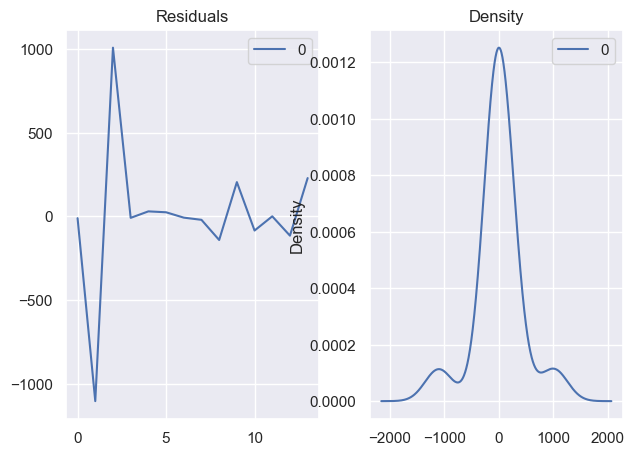

In [83]:

model = ARIMA(np.asarray(train).astype(float), order= s_order)  
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [86]:
from statsmodels.graphics.tsaplots import plot_predict

model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

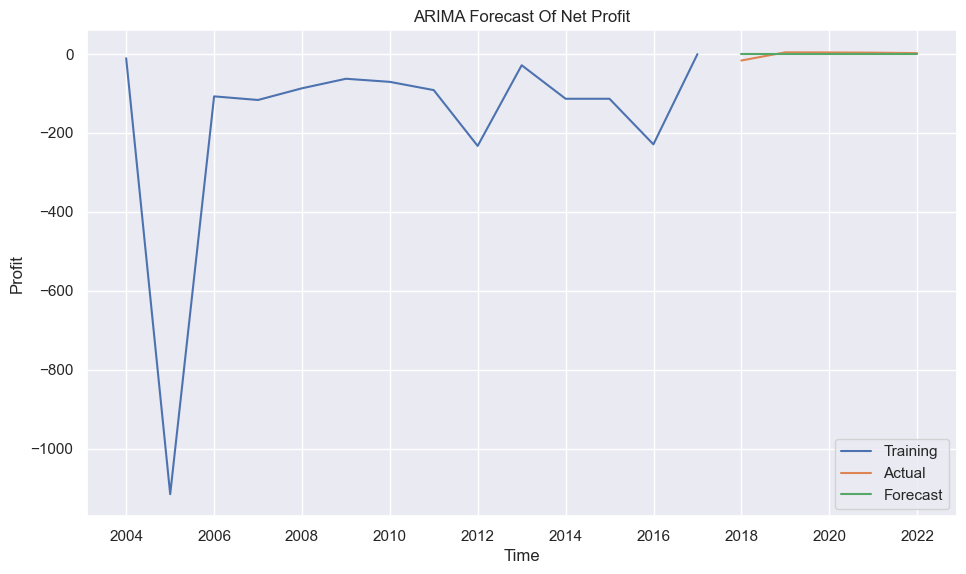

In [44]:
from statsmodels.tsa.arima.model import ARIMA


forecast = model_fit.forecast(steps=len(test))  
predictions=forecast
forecast = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Net_pro_Rate'], label='Training')
plt.plot(test.index, test['Net_pro_Rate'], label='Actual')
plt.plot(forecast.index, forecast['Forecast'], label='Forecast')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.title('ARIMA Forecast Of Net Profit')
plt.show()




In [45]:
rmse = np.sqrt(mean_squared_error(test, predictions))
rmse

7.9905715471632055

In [46]:
forecast

,Forecast
Year_End,
2017-12-31,-0.580811
2018-12-31,-0.580811
2019-12-31,-0.580811
2020-12-31,-0.580811
2021-12-31,-0.580811


In [47]:
last_index = test.index[0]
forecast_values = model_fit.forecast(steps=10)

forecast_index = pd.date_range(start=last_index , periods=10, freq='Y')

# Create a dataframe with the index and forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast_values})
forecast_df.index= forecast_index

# Print the forecast dataframe
forecast_df

,Forecast
2017-12-31,-0.580811
2018-12-31,-0.580811
2019-12-31,-0.580811
2020-12-31,-0.580811
2021-12-31,-0.580811
2022-12-31,-0.580811
2023-12-31,-0.580811
2024-12-31,-0.580811
2025-12-31,-0.580811
2026-12-31,-0.580811


In [48]:
aic = model_fit.aic
print("AIC:", aic)

AIC: 196.37882700673188


In [49]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test, predictions)
print(100-mape,"%")

98.85171110316061 %


### Gearing

In [50]:
train_g = com_1_gear.loc[com_1_gear.index <  output ]
test_g = com_1_gear.loc[com_1_gear.index >= output]

train_g

,Gear_Rate
Year_End,
2003-12-31,0.451837
2004-12-31,0.963102
2005-12-31,0.355184
2006-12-31,0.267755
2007-12-31,0.325796
2008-12-31,0.473755
2009-12-31,0.491265
2010-12-31,0.562612
2011-12-31,0.395714


In [51]:
gear_order =select_BestOrder(orders,train_g,test_g)
gear_order

Order - (0, 0, 0)  RMSE: 1.9277664967520216  AIC: 1.2247285103767043
Order - (0, 0, 1)  RMSE: 1.9285004946635311  AIC: 2.3043361660093202
Order - (0, 0, 2)  RMSE: 1.9316612587358932  AIC: 4.208343173946092
Order - (0, 1, 0)  RMSE: 1.8019416673735547  AIC: 5.538835019174648
Order - (0, 1, 1)  RMSE: 1.8238796435616  AIC: 4.188354834216524
Order - (0, 1, 2)  RMSE: 1.8801238071432478  AIC: 5.544203540048484
Order - (1, 0, 0)  RMSE: 1.925352476697025  AIC: 2.4722168861077307
Order - (1, 0, 1)  RMSE: 1.9299655533837583  AIC: 4.226410620775574
Order - (1, 0, 2)  RMSE: 1.9317594294473044  AIC: 6.208308646227303
Order - (1, 1, 0)  RMSE: 1.8124862188816229  AIC: 6.2493857599105525
Order - (1, 1, 1)  RMSE: 1.892820306040704  AIC: 5.73030642193114
Order - (1, 1, 2)  RMSE: 1.8368468182402018  AIC: 7.846461722556852
Order - (2, 0, 0)  RMSE: 1.9339469431890801  AIC: 4.266230113848692
Order - (2, 0, 1)  RMSE: 1.9318766960022111  AIC: 6.196067646983507
Order - (2, 0, 2)  RMSE: 1.9287026917114294  AIC: 

(2, 1, 2)

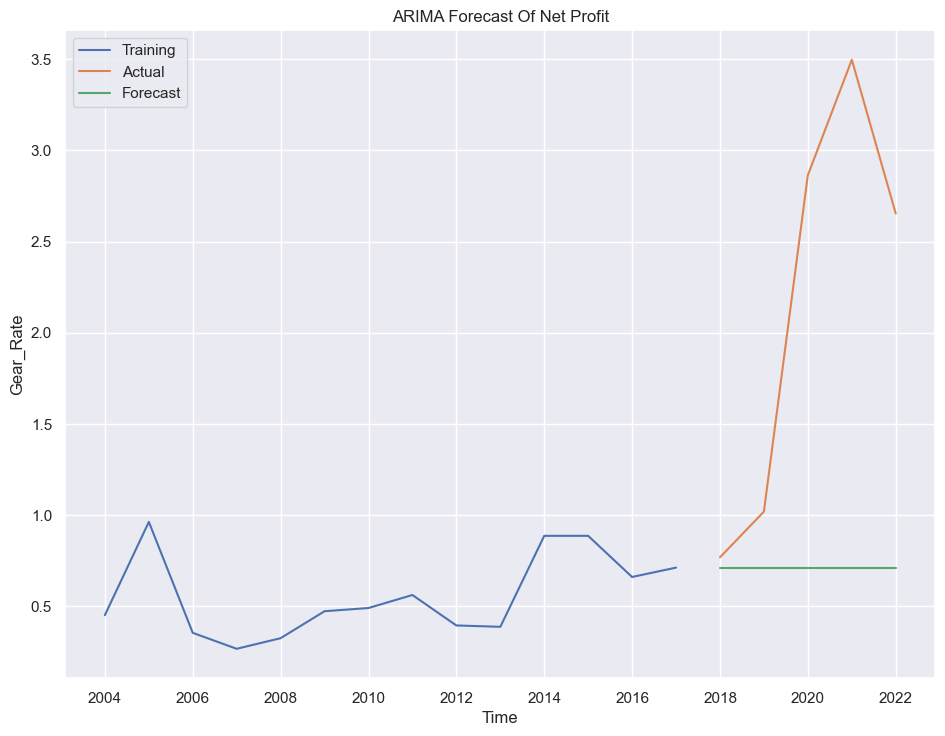

In [77]:
model = ARIMA(np.asarray(train_g).astype(float), order= s_order)  
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_g))  
predictions2=forecast
forecast = pd.DataFrame(forecast, index=test_g.index, columns=['Forecast'])


plt.figure(figsize=(10, 8))
plt.plot(train_g.index, train_g['Gear_Rate'], label='Training')
plt.plot(test_g.index, test_g['Gear_Rate'], label='Actual')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Gear_Rate')
plt.legend()
plt.title('ARIMA Forecast Of Net Profit')
plt.show()

In [74]:
rmse = np.sqrt(mean_squared_error(test_g, predictions2))
rmse

1.8019416673735547

In [54]:
last_index = test_g.index[0]
forecast_values = model_fit.forecast(steps=10)

forecast_index = pd.date_range(start=last_index , periods=10, freq='Y')

# Create a dataframe with the index and forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast_values})
forecast_df.index= forecast_index

# Print the forecast dataframe
forecast_df

,Forecast
2017-12-31,0.712701
2018-12-31,0.712701
2019-12-31,0.712701
2020-12-31,0.712701
2021-12-31,0.712701
2022-12-31,0.712701
2023-12-31,0.712701
2024-12-31,0.712701
2025-12-31,0.712701
2026-12-31,0.712701


###  Model Function

In [55]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

split dataset into companies


In [56]:

gp_com = df_com.groupby('Refno')
gp_com.get_group('0003-1992-GENN')

,Refno,PrjCat,Year_End,AudType,WDA_FA,FA_Cost,D_Expense,Cur_Assets,Stock_Invent,Cash_Bank,...,Cur_Liab,Turnover,Pro_Bef_Tax,Tax,Pro_Aft_Tax,Tot_Liab,Tot_Assets,Liquidity_Rate,Net_pro_Rate,Gear_Rate
2,0003-1992-GENN,21,2003-12-31,0,113.110,366.460,0.0,575.690,95.590,36.210,...,667.190,753.540,-82.550,0.000,-82.550,678.260,707.490,0.862858,-10.954959,0.451837
3,0003-1992-GENN,21,2004-12-31,0,168.380,434.974,0.0,718.230,140.907,26.937,...,872.894,1.047,-11.678,8.735,-20.413,896.490,886.074,0.822815,-1115.377268,0.963102
4,0003-1992-GENN,21,2005-12-31,0,54.346,129.209,0.0,257.952,10.474,4.214,...,537.718,247.197,-265.843,7.601,-273.444,546.420,272.640,0.479716,-107.542972,0.355184
5,0003-1992-GENN,21,2006-12-31,0,52.546,142.724,0.0,160.503,8.799,0.814,...,564.891,110.459,-128.905,0.000,-128.905,571.451,170.116,0.284131,-116.699409,0.267755
6,0003-1992-GENN,21,2007-12-31,0,48.381,139.719,0.0,69.296,13.453,2.449,...,563.660,109.711,-95.562,0.000,-95.562,571.642,85.198,0.122939,-87.103390,0.325796
7,0003-1992-GENN,21,2008-12-31,0,48.249,140.527,0.0,17.835,12.511,0.606,...,586.251,128.937,-81.135,0.000,-81.135,597.858,30.952,0.030422,-62.926080,0.473755
8,0003-1992-GENN,21,2009-12-31,0,45.514,135.792,0.0,15.262,13.224,0.218,...,697.936,95.255,-67.422,0.000,-67.422,709.972,28.704,0.021867,-70.780536,0.491265
9,0003-1992-GENN,21,2010-12-31,0,44.482,127.670,0.0,17.174,13.652,0.442,...,789.602,155.444,-142.534,0.000,-142.534,803.386,31.268,0.021750,-91.694758,0.562612
10,0003-1992-GENN,21,2011-12-31,0,56.836,117.000,0.0,7.318,5.031,0.892,...,87.716,125.785,-293.199,0.000,-293.199,97.411,13.241,0.083428,-233.095361,0.395714
11,0003-1992-GENN,21,2012-12-31,0,48.447,110.688,0.0,19.237,3.954,0.222,...,131.890,141.089,-40.460,0.000,-40.460,141.402,23.413,0.145856,-28.676934,0.388245


In [57]:
df_com.to_csv('çompany_dataset.csv',index=False)

In [58]:
g_keys = gp_com.groups.keys()
g_keys

dict_keys(['0002-1992-GENN', '0003-1992-GENN', '0004-1992-GENN', '0007-1992-GENN', '0008-1992-GENN', '0009-1992-GENN', '0010-1992-GENN', '0011-1992-GENN', '0012-2008-GENN', '0013-2008-GENN', '0014-1992-GENN', '0016-1992-GENN', '0017-2008-GENN', '0018-1982-GENN', '0018-1992-GENN', '0018-2008-GENN', '0019-1992-GENN', '0021-1992-GENN', '0022-1992-GENN', '0023-1978-E01N', '0023-1978-GENN', '0026-2008-GENN', '0027-1992-GENN', '0028-1992-GENN', '0030-1992-GENN', '0030-2008-GENN', '0032-1992-GENN', '0033-1992-GENN', '0033-2008-GENN', '0034-1990-GENN', '0034-1992-GENN', '0034-2008-GENN', '0035-1992-GENN', '0036-1992-GENN', '0037-1992-GENN', '0039-1992-GENN', '0041-1992-GENN', '0042-1992-GENN', '0043-1978-GENN', '0043-1981-GENN', '0043-2008-GENN', '0044-2008-GENN', '0045-1986-GENN', '0046-1992-GENN', '0047-2008-GENN', '0048-2008-GENN', '0049-1987-GENN', '0049-1992-GENN', '0049-2008-GENN', '0051-1992-GENN', '0051-2008-GENN', '0053-2008-GENN', '0054-1992-GENN', '0055-1992-GENN', '0057-2008-GENN',

In [59]:
path =r'E:\\Research Projects\\Forcasting app\\ARIMA_model\\Company_dataset\\'
for g_key in g_keys:
    dataframe = gp_com.get_group(g_key)
    dataframe.to_csv(path+g_key+'.csv',index=False)
    print(g_key)

0002-1992-GENN
0003-1992-GENN
0004-1992-GENN
0007-1992-GENN
0008-1992-GENN
0009-1992-GENN
0010-1992-GENN
0011-1992-GENN
0012-2008-GENN
0013-2008-GENN
0014-1992-GENN
0016-1992-GENN
0017-2008-GENN
0018-1982-GENN
0018-1992-GENN
0018-2008-GENN
0019-1992-GENN
0021-1992-GENN
0022-1992-GENN
0023-1978-E01N
0023-1978-GENN
0026-2008-GENN
0027-1992-GENN
0028-1992-GENN
0030-1992-GENN
0030-2008-GENN
0032-1992-GENN
0033-1992-GENN
0033-2008-GENN
0034-1990-GENN
0034-1992-GENN
0034-2008-GENN
0035-1992-GENN
0036-1992-GENN
0037-1992-GENN
0039-1992-GENN
0041-1992-GENN
0042-1992-GENN
0043-1978-GENN
0043-1981-GENN
0043-2008-GENN
0044-2008-GENN
0045-1986-GENN
0046-1992-GENN
0047-2008-GENN
0048-2008-GENN
0049-1987-GENN
0049-1992-GENN
0049-2008-GENN
0051-1992-GENN
0051-2008-GENN
0053-2008-GENN
0054-1992-GENN
0055-1992-GENN
0057-2008-GENN
0058-1978-GENN
0058-1992-GENN
0058-2008-GENN
0061-1992-GENN
0062-2008-GENN
0065-1992-GENN
0066-1978-GENN
0066-1992-GENN
0066-2008-GENN
0068-2008-GENN
0070-2008-GENN
0072-1978-

1233-2011-GENN
1238-1992-GENN
1240-1992-GENN
1241-2011-GENN
1243-2011-GENN
1244-2011-GENN
1246-1992-GENN
1247-1992-GENN
1248-1992-GENN
1248-2011-GENN
1251-2011-GENN
1254-2011-GENN
1255-2011-GENN
1256-1992-GENN
1256-2011-GENN
1257-2011-GENN
1259-1992-GENN
1259-2011-GENN
1261-2011-GENN
1263-2011-GENN
1264-2011-GENN
1265-1992-GENN
1267-1992-GENN
1268-1992-GENN
1268-2011-GENN
1272-2011-GENN
1274-2011-GENN
1277-2011-GENN
1280-1993-GENN
1280-2011-GENN
1281-1993-GENN
1283-1993-GENN
1285-2011-GENN
1288-2011-GENN
1290-2011-GENN
1292-2011-GENN
1295-2011-GENN
1299-2011-GENN
1303-1993-GENN
1304-1992-GENN
1304-2011-GENN
1305-1992-GENN
1306-2011-GENN
1308-2011-GENN
1309-2011-GENN
1311-2011-GENN
1312-1993-GENN
1312-2011-GENN
1314-1993-GENN
1316-2011-GENN
1317-2011-GENN
1319-2011-GENN
1324-2011-GENN
1325-2011-GENN
1326-1993-GENN
1329-2011-GENN
1330-1993-GENN
1330-2011-E01N
1330-2011-GENN
1332-2011-GENN
1333-1993-GENN
1336-2011-GENN
1338-2011-GENN
1340-1993-GENN
1341-1993-GENN
1342-1993-GENN
1342-2011-

2503-2016-GENN
2504-2016-GENN
2506-1995-GENN
2509-2016-GENN
2513-1995-GENN
2516-2016-GENN
2517-1995-GENN
2523-2016-GENN
2525-2016-GENN
2528-1995-GENN
2530-2016-GENN
2532-2016-GENN
2537-1995-GENN
2541-2016-GENN
2543-2016-GENN
2544-2016-GENN
2546-2016-GENN
2549-2016-GENN
2550-1995-GENN
2551-1995-GENN
2552-2016-GENN
2553-2016-GENN
2556-1995-GENN
2556-2016-GENN
2560-1995-GENN
2561-2016-GENN
2565-2016-GENN
2568-2016-GENN
2570-2016-GENN
2575-2016-GENN
2578-1995-GENN
2579-2016-GENN
2583-2016-GENN
2584-2016-GENN
2587-2016-GENN
2588-2016-GENN
2592-2016-GENN
2598-2016-GENN
2599-1995-GENN
2603-2016-GENN
2604-2016-GENN
2608-2016-GENN
2609-1995-GENN
2616-2016-GENN
2618-2016-GENN
2619-2016-GENN
2624-2016-GENN
2631-1995-GENN
2632-1995-GENN
2634-1995-GENN
2635-1995-GENN
2640-1995-GENN
2647-2017-GENN
2651-2017-GENN
2658-2017-GENN
2659-2017-GENN
2661-1995-GENN
2663-2017-GENN
2665-2017-GENN
2667-1995-GENN
2668-2017-GENN
2669-1995-GENN
2671-2017-GENN
2672-1995-GENN
2672-2017-GENN
2673-2017-GENN
2677-1995-

6034-2002-GENN
6037-2002-GENN
6043-2002-GENN
6045-2002-GENN
6046-2002-GENN
6047-2002-GENN
6056-2002-GENN
6061-2002-GENN
6064-2002-GENN
6065-2002-GENN
6068-2002-GENN
6071-2002-GENN
6077-2002-GENN
6079-2002-GENN
6081-2002-GENN
6082-2002-GENN
6084-2002-GENN
6094-2002-GENN
6096-2002-GENN
6097-2002-GENN
6110-2002-GENN
6112-2002-GENN
6113-2002-GENN
6116-2002-GENN
6117-2002-GENN
6121-2002-GENN
6127-2002-GENN
6138-2002-GENN
6140-2002-GENN
6141-2002-GENN
6164-2002-GENN
6170-2002-GENN
6171-2002-GENN
6185-2002-GENN
6197-2002-GENN
6206-2002-GENN
6210-2002-GENN
6245-2002-GENN
6250-2002-GENN
6260-2002-GENN
6277-2002-GENN
6279-2002-GENN
6284-2002-GENN
6298-2002-GENN
6300-2002-GENN
6312-2002-GENN
6313-2002-GENN
6315-2002-GENN
6335-2002-GENN
6344-2002-GENN
6354-2002-GENN
6358-2002-GENN
6364-2002-GENN
6367-2002-GENN
6388-2002-GENN
6393-2002-GENN
6405-2002-GENN
6408-2002-GENN
6411-2002-GENN
6434-2002-GENN
6437-2002-GENN
6445-2002-GENN
6448-2002-GENN
6452-2002-GENN
6468-2002-GENN
6470-2002-GENN
6474-2002-

9295-2007-GENN
9298-2007-GENN
9299-2007-GENN
9300-2007-GENN
9307-2007-GENN
9313-2007-GENN
9324-2007-GENN
9331-2007-GENN
9333-2007-GENN
9338-2007-GENN
9348-2007-GENN
9349-2007-GENN
9351-2007-GENN
9354-2007-GENN
9359-2007-GENN
9368-2007-GENN
9376-2007-GENN
9381-2007-GENN
9382-2007-GENN
9391-2007-GENN
9393-2007-GENN
9394-2007-GENN
9397-2007-GENN
9400-2007-GENN
9401-2007-GENN
9403-2007-GENN
9405-2007-GENN
9411-2007-GENN
9422-2007-GENN
9424-2007-GENN
9428-2007-GENN
9429-2007-GENN
9439-2007-GENN
9448-2007-GENN
9449-2007-GENN
9451-2007-GENN
9453-2007-GENN
9457-2007-GENN
9460-2007-GENN
9466-2007-GENN
9469-2007-GENN
9473-2007-GENN
9477-2007-GENN
9479-2007-GENN
9485-2007-GENN
9495-2007-GENN
9499-2007-GENN
9502-2007-GENN
9510-2007-GENN
9518-2007-GENN
9526-2007-GENN
9527-2007-GENN
9535-2007-GENN
9541-2007-GENN
9542-2007-GENN
9562-2007-GENN
9563-2007-GENN
9564-2007-GENN
9568-2007-GENN
9570-2007-GENN
9581-2007-GENN
9590-2007-GENN
9596-2007-GENN
9603-2007-GENN
9608-2007-GENN
9613-2007-GENN
9619-2007-

In [ ]:
with open("companies.txt", "w") as txt_file:
    for line in g_keys:
        txt_file.write("".join(line) + "\n")

Model Export

In [ ]:
class Generate_Predictions:
    def Get_dataset(name):
        return name
    